In [1]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 


# doing my own style either for Matplotlib or Seaborn 
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")


In [2]:
# loading A house Data ......  
Housing_Data =pd.read_csv('housing.csv')
Housing_Data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
# knowledage about the columns names 
Housing_Data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [3]:
# Get Information About Housing 
Housing_Data.info 

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [4]:
# describe 
Housing_Data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


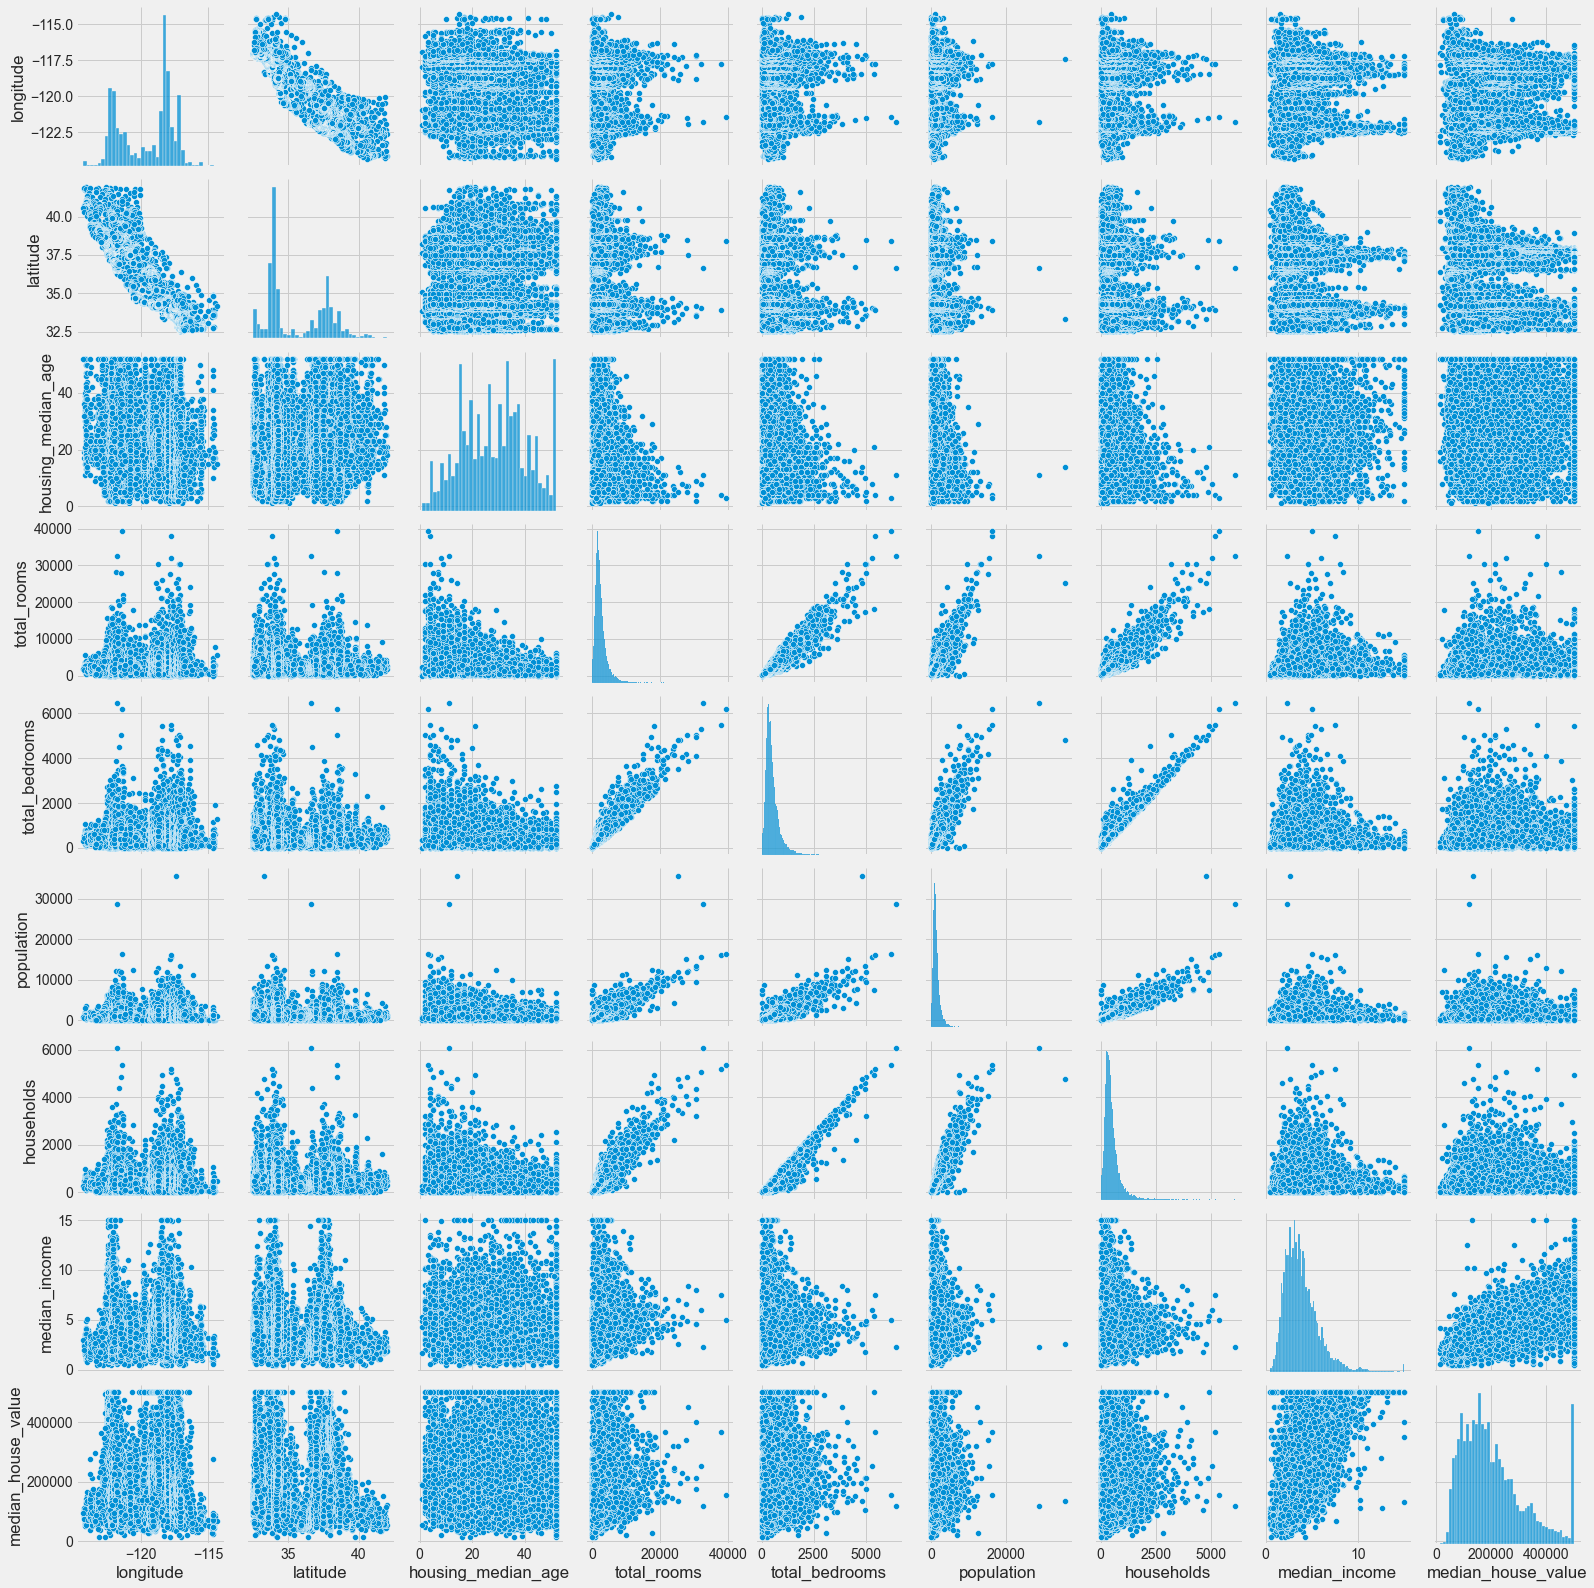

In [5]:
# Exploratory Data Analysis (EDA) 
sns.pairplot(Housing_Data)

/Users/eidmuzil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_income', ylabel='Density'>

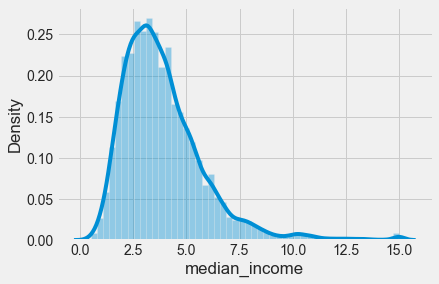

In [6]:
# Get information About the prices .... 
sns.distplot(Housing_Data['median_income'])

/Users/eidmuzil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

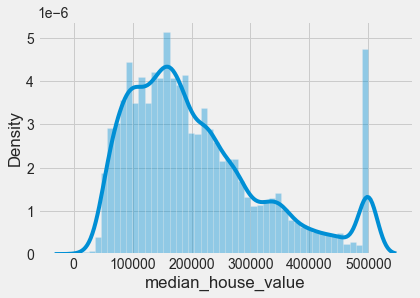

In [7]:
# get information about houses value 
sns.distplot(Housing_Data['median_house_value'])

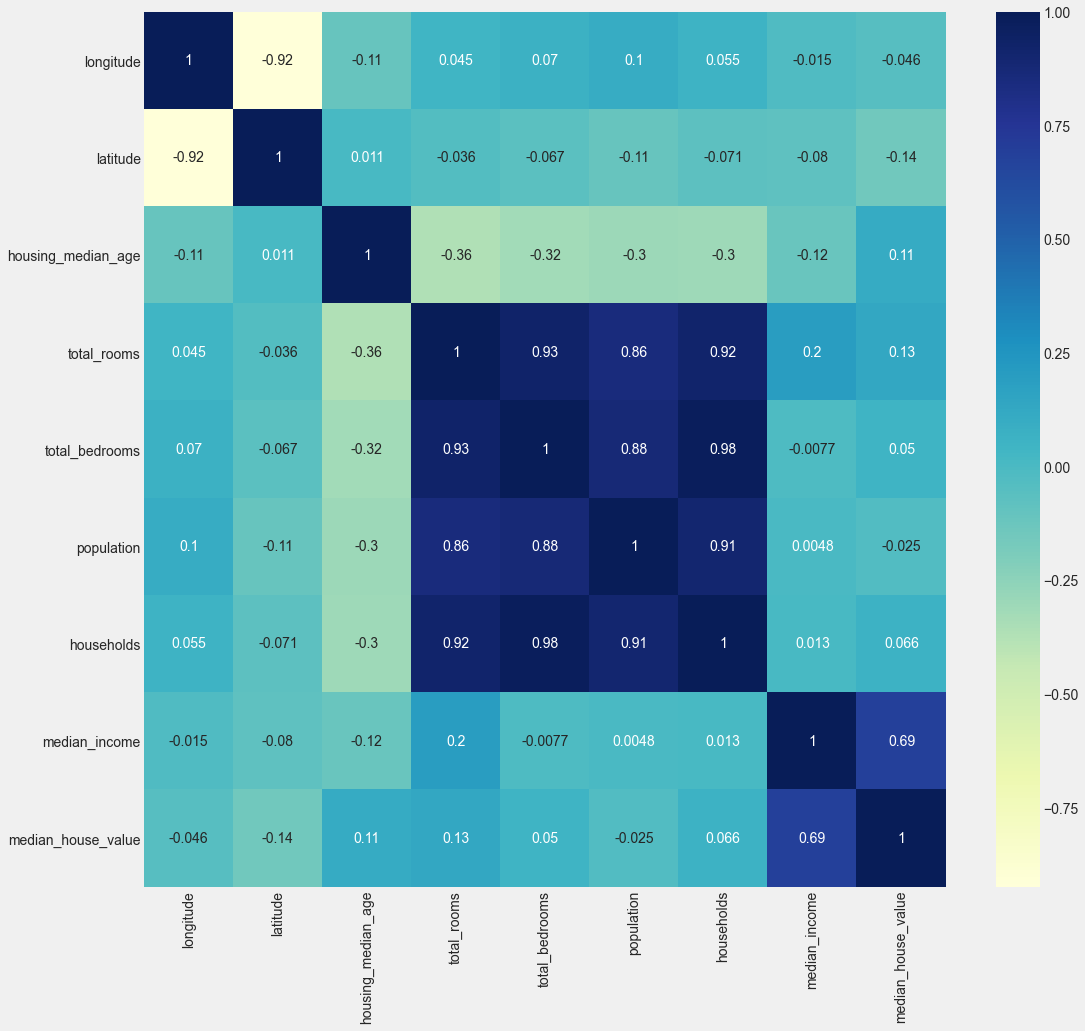

In [17]:
ax =plt.subplots(figsize=(16, 15))
ax = sns.heatmap(Housing_Data.corr(), annot=True, cmap="YlGnBu")

# Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.


In [42]:
X = Housing_Data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                  'population', 'households','median_house_value']]
y = Housing_Data['median_income']

# Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [47]:
# print the intercept
print(lin_reg.intercept_)

3.88075425750969


In [48]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
longitude,-0.038167
latitude,-0.041289
housing_median_age,-0.278185
total_rooms,1.519346
population,0.293584
households,-1.805602
median_house_value,1.255441


In [49]:
Housing_Data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [52]:
pred = lin_reg.predict(X_test)

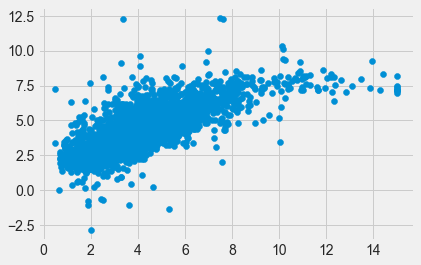

In [53]:
plt.scatter(y_test, pred)

/Users/eidmuzil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


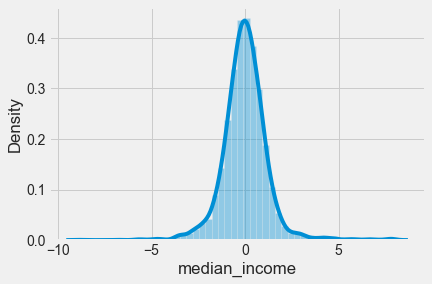

In [54]:
sns.distplot((y_test - pred), bins=50);

In [55]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8293632607449563
MSE: 1.4351470248994502
RMSE: 1.197976220506672
R2 Square 0.5945044216770827
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8148691272153521
MSE: 1.3712800812525174
RMSE: 1.1710166870085659
R2 Square 0.6218322345098256
__________________________________


In [56]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.829363,1.435147,1.197976,0.594504,0.573255


In [57]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.9486984613876679
MSE: 2.2570159973839736
RMSE: 1.5023368455123416
R2 Square 0.3622883291644545
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.9522066391436327
MSE: 2.152083487355806
RMSE: 1.4669981211152952
R2 Square 0.4065044663827657
__________________________________


In [58]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.829363,1.435147,1.197976,0.594504,0.573255
1,Robust Regression,0.948698,2.257016,1.502337,0.362288,0.453732


# Ridge

In [59]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8316956822843699
MSE: 1.4304521179548204
RMSE: 1.1960150993841259
R2 Square 0.5958309505787597
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8183401775661983
MSE: 1.3738759094120985
RMSE: 1.172124528116402
R2 Square 0.6211163643180784
__________________________________


In [60]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.829363,1.435147,1.197976,0.594504,0.573255
1,Robust Regression,0.948698,2.257016,1.502337,0.362288,0.453732
2,Ridge Regression,0.831696,1.430452,1.196015,0.595831,0.573255


# LASSO Regression

In [61]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.001422094150603
MSE: 1.8873144473998802
RMSE: 1.3737956352383276
R2 Square 0.4667461590708937
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0013142299873883
MSE: 1.872845959096242
RMSE: 1.3685196232046664
R2 Square 0.48351180685727013
__________________________________


In [62]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.829363,1.435147,1.197976,0.594504,0.573255
1,Robust Regression,0.948698,2.257016,1.502337,0.362288,0.453732
2,Ridge Regression,0.831696,1.430452,1.196015,0.595831,0.573255
3,Lasso Regression,1.001422,1.887314,1.373796,0.466746,0.574355


# Elastic Net

In [63]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.9151585066730604
MSE: 1.631135627603704
RMSE: 1.27715920213719
R2 Square 0.5391285539649715
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.9119397162783996
MSE: 1.6106655522401225
RMSE: 1.2691199912695894
R2 Square 0.555815182346778
__________________________________


In [64]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.829363,1.435147,1.197976,0.594504,0.573255
1,Robust Regression,0.948698,2.257016,1.502337,0.362288,0.453732
2,Ridge Regression,0.831696,1.430452,1.196015,0.595831,0.573255
3,Lasso Regression,1.001422,1.887314,1.373796,0.466746,0.574355
4,Elastic Net Regression,0.915159,1.631136,1.277159,0.539129,0.576558


# Polynomial Regression

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.7360264074484049
MSE: 1.1273660613330787
RMSE: 1.0617749579515796
R2 Square 0.6814668148345884
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.7227984825366622
MSE: 1.0924206470459663
RMSE: 1.0451892876632283
R2 Square 0.6987353052693915
__________________________________


In [66]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.829363,1.435147,1.197976,0.594504,0.573255
1,Robust Regression,0.948698,2.257016,1.502337,0.362288,0.453732
2,Ridge Regression,0.831696,1.430452,1.196015,0.595831,0.573255
3,Lasso Regression,1.001422,1.887314,1.373796,0.466746,0.574355
4,Elastic Net Regression,0.915159,1.631136,1.277159,0.539129,0.576558
5,Polynomail Regression,0.736026,1.127366,1.061775,0.681467,0.000000


# Stochastic Gradient Descent


In [67]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8504608151482819
MSE: 1.462649856819255
RMSE: 1.2094006188270514
R2 Square 0.5867335964296689
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8409974895065484
MSE: 1.4235369831597118
RMSE: 1.193120690944429
R2 Square 0.6074209730207558
__________________________________


In [68]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.829363,1.435147,1.197976,0.594504,0.573255
1,Robust Regression,0.948698,2.257016,1.502337,0.362288,0.453732
2,Ridge Regression,0.831696,1.430452,1.196015,0.595831,0.573255
3,Lasso Regression,1.001422,1.887314,1.373796,0.466746,0.574355
4,Elastic Net Regression,0.915159,1.631136,1.277159,0.539129,0.576558
5,Polynomail Regression,0.736026,1.127366,1.061775,0.681467,0.000000
6,Stochastic Gradient Descent,0.850461,1.462650,1.209401,0.586734,0.000000


# Artficial Neural Network

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
16512/16512 [==============================] - 41s 2ms/step - loss: 7.1912 - val_loss: 2.6516
Epoch 2/100
16512/16512 [==============================] - 35s 2ms/step - loss: 2.4776 - val_loss: 2.3219
Epoch 3/100
16512/16512 [==============================] - 34s 2ms/step - loss: 2.2408 - val_loss: 2.1440
Epoch 4/100
16512/16512 [==============================] - 32s 2ms/step - loss: 2.0794 - val_loss: 2.0201
Epoch 5/100
16512/16512 [==============================] - 28s 2ms/step - loss: 1.9846 - val_loss: 1.8758
Epoch 6/100
16512/16512 [==============================] - 30s 2ms/step - loss: 1.9387 - val_loss: 1.7830
Epoch 7/100
16512/16512 [==============================] - 29s 2ms/step - loss: 1.7724 - val_loss: 1.7165
Epoch 8/100
16512/16512 [==============================] - 29s 2ms/step - loss: 1.7484 - val_loss: 1.6678
Epoch 9/100
16512/16512 [==============================] - 29s 2ms/step - loss: 1.6984 - val_loss: 1.6132
Epoch 10/100
16512/16512 [====================

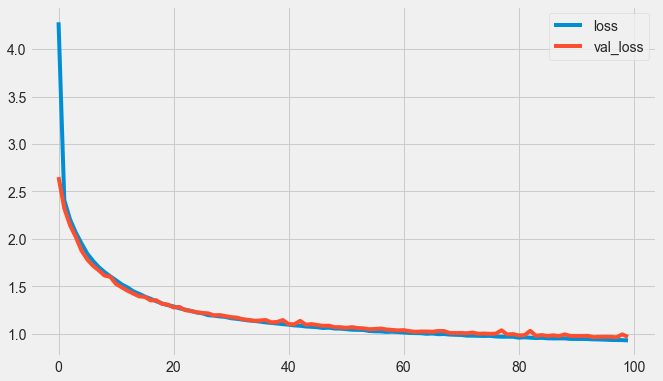

In [70]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [71]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.7047297331852967
MSE: 0.9666257464777964
RMSE: 0.983171270164968
R2 Square 0.7268834068639778
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.6921611031627529
MSE: 0.9227666651769834
RMSE: 0.9606074459304297
R2 Square 0.7455220034115411
__________________________________


In [72]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.829363,1.435147,1.197976,0.594504,0.573255
1,Robust Regression,0.948698,2.257016,1.502337,0.362288,0.453732
2,Ridge Regression,0.831696,1.430452,1.196015,0.595831,0.573255
3,Lasso Regression,1.001422,1.887314,1.373796,0.466746,0.574355
4,Elastic Net Regression,0.915159,1.631136,1.277159,0.539129,0.576558
5,Polynomail Regression,0.736026,1.127366,1.061775,0.681467,0.000000
6,Stochastic Gradient Descent,0.850461,1.462650,1.209401,0.586734,0.000000
7,Artficial Neural Network,0.704730,0.966626,0.983171,0.726883,0.000000


# Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.6656368484738373
MSE: 0.9238273139776008
RMSE: 0.961159359303961
R2 Square 0.7389759484899462
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.2448203125969001
MSE: 0.12576636736912844
RMSE: 0.35463554160451605
R2 Square 0.965316504795754
__________________________________


In [74]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.829363,1.435147,1.197976,0.594504,0.573255
1,Robust Regression,0.948698,2.257016,1.502337,0.362288,0.453732
2,Ridge Regression,0.831696,1.430452,1.196015,0.595831,0.573255
3,Lasso Regression,1.001422,1.887314,1.373796,0.466746,0.574355
4,Elastic Net Regression,0.915159,1.631136,1.277159,0.539129,0.576558
5,Polynomail Regression,0.736026,1.127366,1.061775,0.681467,0.000000
6,Stochastic Gradient Descent,0.850461,1.462650,1.209401,0.586734,0.000000
7,Artficial Neural Network,0.704730,0.966626,0.983171,0.726883,0.000000
8,Random Forest Regressor,0.665637,0.923827,0.961159,0.738976,0.000000


# Support Vector Machine

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

In [ ]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))